In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

for column in X.columns:
    X[column] = pd.to_numeric(X[column])
    X[column] = X[column].fillna(X[column].mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)


# Logistic Regression

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

estimators = [('Scaler', StandardScaler()), ('Log_Reg', LogisticRegression(random_state=seed, solver='liblinear'))]
pipe = Pipeline(estimators)

clf = pipe.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.8123929571466114
Average Precision: 0.748206340300866
Accuracy: 0.7600585223116313


# Descriptive Statistics

In [2]:
from tableone import TableOne, load_dataset
import pandas as pd

data_filtered = data.drop(['In Hospital Death'], axis=1)
columns = list(data_filtered.columns.values)
groupby = ['28 Day Death']
nonnormal = ['Age']
# labels={'28 Day Death': 'Mortality'}
mytable = TableOne(data_filtered, columns=columns, groupby=groupby, nonnormal=nonnormal, pval=True)
mytable

/home/llja/anaconda3/envs/datathon/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


Grouped by 28 Day Death                                                                 
                                                                     Missing            Overall                  0                  1 P-Value
n                                                                                          4555               2820               1735        
Age, median [Q1,Q3]                                                        0   68.5 [55.9,80.2]   66.2 [53.9,78.5]   72.2 [59.7,82.7]  <0.001
Gender, n (%)                                  0                           0        2029 (44.5)        1290 (45.7)         739 (42.6)   0.041
                                               1                                    2526 (55.5)        1530 (54.3)         996 (57.4)        
LOS, mean (SD)                                                             0        15.3 (17.1)        15.9 (16.9)        14.3 (17.5)   0.002
Hypertension, n (%)                            0.0                       124        2771 (62.5)        1751 (62.4)        1020 (62.7)   0.896
                                               1.0                                  1660 (37.5)        1053 (37.6)         607 (37.3)        
Hyperlipidemia, n (%)                          0.0                       124        4253 (96.0)        2667 (95.1)        1586 (97.5)  <0.001
                                               1.0                                    178 (4.0)          137 (4.9)           41 (2.5)        
Diabetes, n (%)                                0.0                       124        4141 (93.5)        2613 (93.2)        1528 (93.9)   0.379
                                               1.0                                    290 (6.5)          191 (6.8)           99 (6.1)        
Hematocrit, mean (SD)                                                      6         33.9 (6.4)         34.1 (6.2)         33.4 (6.6)  <0.001
Hematocrit, Calculated, mean (SD)                                       2654         31.4 (6.7)         31.7 (6.5)         31.0 (7.0)   0.033
Hemoglobin, mean (SD)                                                      7         11.3 (2.2)         11.4 (2.2)         11.0 (2.2)  <0.001
Red Blood Cells, mean (SD)                                                10          3.7 (0.8)          3.8 (0.7)          3.6 (0.8)  <0.001
Nucleated Red Cells, mean (SD)                                          3651         4.1 (14.2)          2.4 (4.1)         5.4 (18.1)  <0.001
RDW, mean (SD)                                                             9         15.8 (2.4)         15.4 (2.2)         16.6 (2.6)  <0.001
MCH, mean (SD)                                                            10         30.3 (3.0)         30.1 (2.9)         30.5 (3.2)  <0.001
MCHC, mean (SD)                                                            8         33.2 (1.6)         33.3 (1.6)         32.9 (1.7)  <0.001
MCV, mean (SD)                                                            10         91.3 (8.2)         90.4 (7.7)         92.7 (8.8)  <0.001
White Blood Cells, mean (SD)                                               7        14.2 (12.0)        14.1 (11.6)        14.4 (12.7)   0.527
Lymphocytes, mean (SD)                                                   123        10.8 (11.8)        10.7 (11.6)        10.9 (12.2)   0.601
Lymphs, mean (SD)                                                       4287        49.1 (32.6)        50.5 (32.1)        46.1 (33.8)   0.317
Basophils, mean (SD)                                                     137          0.2 (0.4)          0.2 (0.5)          0.2 (0.4)   0.263
Eosinophils, mean (SD)                                                   166          0.9 (2.4)          0.8 (2.0)          0.9 (2.9)   0.346
Neutrophils, mean (SD)                                                   137        77.6 (17.5)        78.1 (16.5)        76.7 (18.9)   0.009
Monocytes, mean (SD)                                                     130 

In [5]:
mytable.to_csv('data_processed/sepsis_28d_death_summary.csv')

# Gradient Boosting

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [170, 180, 200, 220], 
    'max_depth':[5, 7, 9]
}

GBoost = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=seed)
clf = GridSearchCV(GBoost, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)


{'max_depth': 7, 'n_estimators': 200}
0.8598192919027268


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=220, max_depth=7, random_state=seed).fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.8732000942430203
Average Precision: 0.8290912492953482
Accuracy: 0.7944403803950256


# Random Forest

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [360, 380, 400], 
    'max_depth':[11, 13, 15]
}

RanFor = RandomForestClassifier(n_estimators=110, max_depth=7, random_state=seed)
clf = GridSearchCV(RanFor, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 13, 'n_estimators': 400}
0.8403189473593166


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=380, max_depth=13, random_state=seed)
clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.850763005989869
Average Precision: 0.8006521797308335
Accuracy: 0.7637161667885881


In [4]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

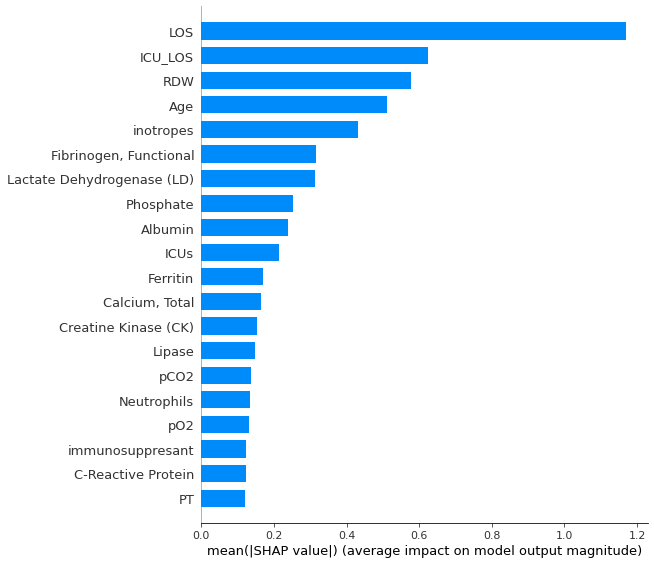

In [23]:
shap.summary_plot(shap_values, X, plot_type="bar")

# Neural Networks

In [2]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

'''
    Define MLP network
'''

class NetSimple(nn.Module):
    def __init__(self):
        super(NetSimple, self).__init__()
        self.fc1 = nn.Linear(113, 100)
        self.fc7 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        x = self.fc1(inputs)
        x = self.fc7(F.selu(x))
        return self.sigmoid(x)
    


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
'''
    Train model
'''
import numpy as np

from scipy.special import expit, logit

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pdb

def train(inputs, labels, net, optimizer):
    running_loss = 0.0
    inputsVariable = Variable(torch.from_numpy(inputs).float())
    labelsVariable = Variable(torch.from_numpy(labels).float())
    
    for t in range(10000):  # loop over the dataset multiple otimes

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputsVariable)
        # pdb.set_trace()
        loss = criterion(outputs.squeeze(), labelsVariable)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if t % 100 == 99:    # print every 50 mini-batches
            print('[%4d] loss: %.3f' %
                  (t + 1, running_loss / 100))
            if running_loss / 100 < 0.1:
                break
            else:
                running_loss = 0.0

    print('Finished Training')


skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_train_scaled, y_train)

# net = NetSimple()
# criterion = nn.NLLLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.0001)

index = 0
for train_index, test_index in skf.split(X_train_scaled, y_train):
    print("Cross Validation Fold: " + str(index+1))
    
    net = NetSimple()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(net.parameters(), lr = 0.01)

    train(X_train_scaled[train_index], y_train.iloc[train_index].values, net, optimizer)
    
    print("")
    print('Train Performance')
    
    train_inputs = Variable(torch.from_numpy(X_train_scaled[train_index]).float())
    train_outputs = net(train_inputs)
    
    probs = torch.max(train_outputs.data, 1).values.data.numpy()
    predictions = (probs >= 0.5).astype(int)
    
    roc_auc = roc_auc_score(y_train.iloc[train_index], probs)
    print("ROC AUC: " + str(roc_auc))

    average_precision = average_precision_score(y_train.iloc[train_index], probs)
    print("Average Precision: " + str(average_precision))

    accuracy = accuracy_score(y_train.iloc[train_index], predictions)
    print("Accuracy: " + str(accuracy))

    print(confusion_matrix(y_train.iloc[train_index], predictions))
    
    print("")
    print('Test Performance')
    
    test_inputs = Variable(torch.from_numpy(X_train_scaled[test_index]).float())
    test_outputs = net(test_inputs)
    
    probs = torch.max(test_outputs.data, 1).values.data.numpy()
    predictions = (probs >= 0.5).astype(int)
    
    roc_auc = roc_auc_score(y_train.iloc[test_index], probs)
    print("ROC AUC: " + str(roc_auc))

    average_precision = average_precision_score(y_train.iloc[test_index], probs)
    print("Average Precision: " + str(average_precision))

    accuracy = accuracy_score(y_train.iloc[test_index], predictions)
    print("Accuracy: " + str(accuracy))

    print(confusion_matrix(y_train.iloc[test_index], predictions))
    
    print("")
    print("")
    
    index += 1

Cross Validation Fold: 1
[ 100] loss: 0.643
[ 200] loss: 0.583
[ 300] loss: 0.553
[ 400] loss: 0.535
[ 500] loss: 0.523
[ 600] loss: 0.513
[ 700] loss: 0.506
[ 800] loss: 0.501
[ 900] loss: 0.496
[1000] loss: 0.493
[1100] loss: 0.490
[1200] loss: 0.487
[1300] loss: 0.484
[1400] loss: 0.482
[1500] loss: 0.481
[1600] loss: 0.479
[1700] loss: 0.477
[1800] loss: 0.476
[1900] loss: 0.475
[2000] loss: 0.473
[2100] loss: 0.472
[2200] loss: 0.471
[2300] loss: 0.470
[2400] loss: 0.469
[2500] loss: 0.468
[2600] loss: 0.466
[2700] loss: 0.465
[2800] loss: 0.464
[2900] loss: 0.463
[3000] loss: 0.462
[3100] loss: 0.462
[3200] loss: 0.461
[3300] loss: 0.460
[3400] loss: 0.459
[3500] loss: 0.458
[3600] loss: 0.457
[3700] loss: 0.456
[3800] loss: 0.455
[3900] loss: 0.454
[4000] loss: 0.453
[4100] loss: 0.452
[4200] loss: 0.451
[4300] loss: 0.450
[4400] loss: 0.449
[4500] loss: 0.448
[4600] loss: 0.447
[4700] loss: 0.446
[4800] loss: 0.445
[4900] loss: 0.444
[5000] loss: 0.443
[5100] loss: 0.442
[5200]

[8100] loss: 0.395
[8200] loss: 0.393
[8300] loss: 0.391
[8400] loss: 0.390
[8500] loss: 0.388
[8600] loss: 0.386
[8700] loss: 0.384
[8800] loss: 0.382
[8900] loss: 0.380
[9000] loss: 0.378
[9100] loss: 0.376
[9200] loss: 0.375
[9300] loss: 0.373
[9400] loss: 0.371
[9500] loss: 0.369
[9600] loss: 0.367
[9700] loss: 0.365
[9800] loss: 0.363
[9900] loss: 0.360
[10000] loss: 0.358
Finished Training

Train Performance
ROC AUC: 0.9208461302711973
Average Precision: 0.8950814272702864
Accuracy: 0.8459427675421404
[[1449  132]
 [ 261  709]]

Test Performance
ROC AUC: 0.78880636049796
Average Precision: 0.7160663757154302
Accuracy: 0.7362637362637363
[[327  68]
 [100 142]]


Cross Validation Fold: 5
[ 100] loss: 0.664
[ 200] loss: 0.594
[ 300] loss: 0.560
[ 400] loss: 0.540
[ 500] loss: 0.526
[ 600] loss: 0.517
[ 700] loss: 0.510
[ 800] loss: 0.505
[ 900] loss: 0.501
[1000] loss: 0.498
[1100] loss: 0.495
[1200] loss: 0.493
[1300] loss: 0.491
[1400] loss: 0.489
[1500] loss: 0.487
[1600] loss: 0

In [5]:
net = NetSimple()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)

train(X_train_scaled, y_train.values, net, optimizer)

print("")
print('Train Performance')

train_inputs = Variable(torch.from_numpy(X_train_scaled).float())
train_outputs = net(train_inputs)

probs = torch.max(train_outputs.data, 1).values.data.numpy()
predictions = (probs >= 0.5).astype(int)

roc_auc = roc_auc_score(y_train, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_train, probs)
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_train, predictions)
print("Accuracy: " + str(accuracy))

print(confusion_matrix(y_train, predictions))

print("")
print('Test Performance')

test_inputs = Variable(torch.from_numpy(X_test_scaled).float())
test_outputs = net(test_inputs)

probs = torch.max(test_outputs.data, 1).values.data.numpy()
predictions = (probs >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

print(confusion_matrix(y_test, predictions))

[ 100] loss: 0.636
[ 200] loss: 0.574
[ 300] loss: 0.546
[ 400] loss: 0.531
[ 500] loss: 0.520
[ 600] loss: 0.513
[ 700] loss: 0.507
[ 800] loss: 0.503
[ 900] loss: 0.500
[1000] loss: 0.497
[1100] loss: 0.495
[1200] loss: 0.493
[1300] loss: 0.491
[1400] loss: 0.489
[1500] loss: 0.488
[1600] loss: 0.487
[1700] loss: 0.485
[1800] loss: 0.484
[1900] loss: 0.483
[2000] loss: 0.482
[2100] loss: 0.481
[2200] loss: 0.480
[2300] loss: 0.479
[2400] loss: 0.478
[2500] loss: 0.477
[2600] loss: 0.476
[2700] loss: 0.475
[2800] loss: 0.474
[2900] loss: 0.474
[3000] loss: 0.473
[3100] loss: 0.472
[3200] loss: 0.471
[3300] loss: 0.470
[3400] loss: 0.469
[3500] loss: 0.468
[3600] loss: 0.468
[3700] loss: 0.467
[3800] loss: 0.466
[3900] loss: 0.465
[4000] loss: 0.464
[4100] loss: 0.463
[4200] loss: 0.463
[4300] loss: 0.462
[4400] loss: 0.461
[4500] loss: 0.460
[4600] loss: 0.459
[4700] loss: 0.458
[4800] loss: 0.457
[4900] loss: 0.456
[5000] loss: 0.455
[5100] loss: 0.454
[5200] loss: 0.454
[5300] loss:

In [3]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

'''
    Define MLP network
'''

class NetSimple(nn.Module):
    def __init__(self):
        super(NetSimple, self).__init__()
        self.fc1 = nn.Linear(113, 100)
        self.fc7 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        inputs = Variable(torch.from_numpy(inputs).float())
        x = self.fc1(inputs)
        x = self.fc7(F.selu(x))
        return self.sigmoid(x)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
'''
    Train model
'''
import numpy as np

from scipy.special import expit, logit

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pdb

def train(inputs, labels, net, optimizer):
    running_loss = 0.0
    # inputsVariable = Variable(torch.from_numpy(inputs).float())
    labelsVariable = Variable(torch.from_numpy(labels).float())
    
    for t in range(10000):  # loop over the dataset multiple otimes

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # pdb.set_trace()
        loss = criterion(outputs.squeeze(), labelsVariable)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if t % 100 == 99:    # print every 50 mini-batches
            print('[%4d] loss: %.3f' %
                  (t + 1, running_loss / 100))
            if running_loss / 100 < 0.1:
                break
            else:
                running_loss = 0.0

    print('Finished Training')


skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_train_scaled, y_train)

# net = NetSimple()
# criterion = nn.NLLLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.0001)

index = 0
for train_index, test_index in skf.split(X_train_scaled, y_train):
    print("Cross Validation Fold: " + str(index+1))
    
    net = NetSimple()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(net.parameters(), lr = 0.01)

    train(X_train_scaled[train_index], y_train.iloc[train_index].values, net, optimizer)
    
    print("")
    print('Train Performance')
    
    # train_inputs = Variable(torch.from_numpy(X_train_scaled[train_index]).float())
    train_outputs = net(X_train_scaled[train_index])
    
    probs = torch.max(train_outputs.data, 1).values.data.numpy()
    predictions = (probs >= 0.5).astype(int)
    
    roc_auc = roc_auc_score(y_train.iloc[train_index], probs)
    print("ROC AUC: " + str(roc_auc))

    average_precision = average_precision_score(y_train.iloc[train_index], probs)
    print("Average Precision: " + str(average_precision))

    accuracy = accuracy_score(y_train.iloc[train_index], predictions)
    print("Accuracy: " + str(accuracy))

    print(confusion_matrix(y_train.iloc[train_index], predictions))
    
    print("")
    print('Test Performance')
    
    # test_inputs = Variable(torch.from_numpy(X_train_scaled[test_index]).float())
    test_outputs = net(X_train_scaled[test_index])
    
    probs = torch.max(test_outputs.data, 1).values.data.numpy()
    predictions = (probs >= 0.5).astype(int)
    
    roc_auc = roc_auc_score(y_train.iloc[test_index], probs)
    print("ROC AUC: " + str(roc_auc))

    average_precision = average_precision_score(y_train.iloc[test_index], probs)
    print("Average Precision: " + str(average_precision))

    accuracy = accuracy_score(y_train.iloc[test_index], predictions)
    print("Accuracy: " + str(accuracy))

    print(confusion_matrix(y_train.iloc[test_index], predictions))
    
    print("")
    print("")
    
    index += 1

Cross Validation Fold: 1
[ 100] loss: 0.655
[ 200] loss: 0.583
[ 300] loss: 0.549
[ 400] loss: 0.529
[ 500] loss: 0.516
[ 600] loss: 0.507
[ 700] loss: 0.500
[ 800] loss: 0.495
[ 900] loss: 0.491
[1000] loss: 0.488
[1100] loss: 0.485
[1200] loss: 0.483
[1300] loss: 0.481
[1400] loss: 0.479
[1500] loss: 0.478
[1600] loss: 0.476
[1700] loss: 0.475
[1800] loss: 0.474
[1900] loss: 0.472
[2000] loss: 0.471
[2100] loss: 0.470
[2200] loss: 0.469
[2300] loss: 0.468
[2400] loss: 0.467
[2500] loss: 0.466
[2600] loss: 0.465
[2700] loss: 0.463
[2800] loss: 0.462
[2900] loss: 0.461
[3000] loss: 0.461
[3100] loss: 0.460
[3200] loss: 0.459
[3300] loss: 0.458
[3400] loss: 0.457
[3500] loss: 0.456
[3600] loss: 0.455
[3700] loss: 0.454
[3800] loss: 0.453
[3900] loss: 0.452
[4000] loss: 0.451
[4100] loss: 0.450
[4200] loss: 0.449
[4300] loss: 0.448
[4400] loss: 0.447
[4500] loss: 0.446
[4600] loss: 0.445
[4700] loss: 0.444
[4800] loss: 0.443
[4900] loss: 0.442
[5000] loss: 0.441
[5100] loss: 0.440
[5200]

[8100] loss: 0.399
[8200] loss: 0.397
[8300] loss: 0.396
[8400] loss: 0.394
[8500] loss: 0.392
[8600] loss: 0.390
[8700] loss: 0.389
[8800] loss: 0.387
[8900] loss: 0.385
[9000] loss: 0.383
[9100] loss: 0.381
[9200] loss: 0.379
[9300] loss: 0.377
[9400] loss: 0.375
[9500] loss: 0.374
[9600] loss: 0.372
[9700] loss: 0.370
[9800] loss: 0.368
[9900] loss: 0.366
[10000] loss: 0.364
Finished Training

Train Performance
ROC AUC: 0.9169480362813567
Average Precision: 0.8884503278598503
Accuracy: 0.8471187769502156
[[1447  134]
 [ 256  714]]

Test Performance
ROC AUC: 0.7894131185270425
Average Precision: 0.7210822573104327
Accuracy: 0.7456828885400314
[[332  63]
 [ 99 143]]


Cross Validation Fold: 5
[ 100] loss: 0.664
[ 200] loss: 0.590
[ 300] loss: 0.555
[ 400] loss: 0.534
[ 500] loss: 0.521
[ 600] loss: 0.512
[ 700] loss: 0.505
[ 800] loss: 0.500
[ 900] loss: 0.496
[1000] loss: 0.493
[1100] loss: 0.491
[1200] loss: 0.488
[1300] loss: 0.487
[1400] loss: 0.485
[1500] loss: 0.484
[1600] loss:

In [6]:
net = NetSimple()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)

train(X_train_scaled, y_train.values, net, optimizer)

print("")
print('Train Performance')

# train_inputs = Variable(torch.from_numpy(X_train_scaled).float())
train_outputs = net(X_train_scaled)

probs = torch.max(train_outputs.data, 1).values.data.numpy()
predictions = (probs >= 0.5).astype(int)

roc_auc = roc_auc_score(y_train, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_train, probs)
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_train, predictions)
print("Accuracy: " + str(accuracy))

print(confusion_matrix(y_train, predictions))

print("")
print('Test Performance')

# test_inputs = Variable(torch.from_numpy(X_test_scaled).float())
test_outputs = net(X_test_scaled)

probs = torch.max(test_outputs.data, 1).values.data.numpy()
predictions = (probs >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

print(confusion_matrix(y_test, predictions))

[ 100] loss: 0.665
[ 200] loss: 0.593
[ 300] loss: 0.558
[ 400] loss: 0.538
[ 500] loss: 0.525
[ 600] loss: 0.515
[ 700] loss: 0.509
[ 800] loss: 0.504
[ 900] loss: 0.500
[1000] loss: 0.498
[1100] loss: 0.495
[1200] loss: 0.493
[1300] loss: 0.491
[1400] loss: 0.490
[1500] loss: 0.489
[1600] loss: 0.487
[1700] loss: 0.486
[1800] loss: 0.485
[1900] loss: 0.484
[2000] loss: 0.483
[2100] loss: 0.482
[2200] loss: 0.481
[2300] loss: 0.480
[2400] loss: 0.479
[2500] loss: 0.478
[2600] loss: 0.477
[2700] loss: 0.477
[2800] loss: 0.476
[2900] loss: 0.475
[3000] loss: 0.474
[3100] loss: 0.473
[3200] loss: 0.473
[3300] loss: 0.472
[3400] loss: 0.471
[3500] loss: 0.470
[3600] loss: 0.469
[3700] loss: 0.469
[3800] loss: 0.468
[3900] loss: 0.467
[4000] loss: 0.466
[4100] loss: 0.465
[4200] loss: 0.465
[4300] loss: 0.464
[4400] loss: 0.463
[4500] loss: 0.462
[4600] loss: 0.461
[4700] loss: 0.460
[4800] loss: 0.460
[4900] loss: 0.459
[5000] loss: 0.458
[5100] loss: 0.457
[5200] loss: 0.456
[5300] loss:

In [7]:
def transform_net(inputs):
    outputs = net(inputs)
    return outputs.detach().numpy()


In [ ]:
import shap

explainer = shap.KernelExplainer(transform_net, X_train_scaled[:50])
shap_values = explainer.shap_values(X_test_scaled, nsamples=500)


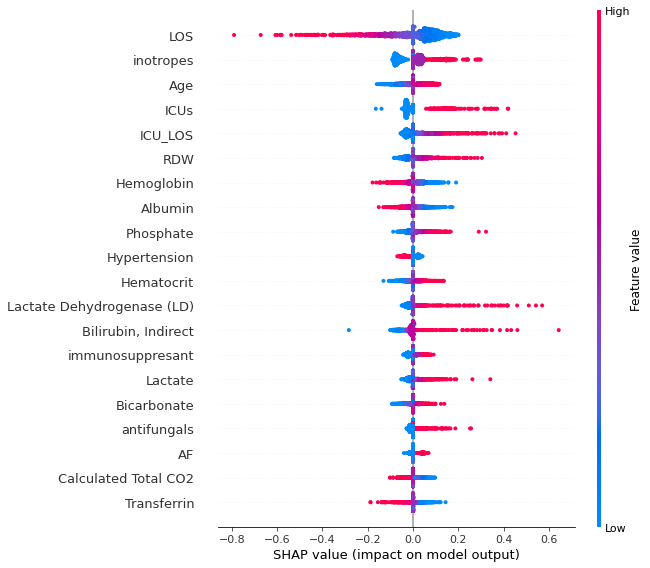

In [29]:
shap.summary_plot(shap_values[0], X_test)